In [1]:
!wget 'https://www.datos.gov.co/api/views/jbqm-s5tn/rows.csv?accessType=DOWNLOAD' -O 'SituacionDesminadoHumanitario.csv' &> /dev/null
!wget 'https://www.datos.gov.co/api/views/4nyw-8qqq/rows.csv?accessType=DOWNLOAD' -O 'EducacionRiesgoMinas.csv'  &> /dev/null
!wget 'https://www.datos.gov.co/api/views/sgp4-3e6k/rows.csv?accessType=DOWNLOAD' -O 'EventosMinas.csv' &> /dev/null
!wget 'https://www.datos.gov.co/api/views/yhxn-eqqw/rows.csv?accessType=DOWNLOAD' -O 'VictimasMinas.csv' &> /dev/null
!wget 'https://www.datos.gov.co/api/views/xdk5-pm3f/rows.csv?accessType=DOWNLOAD' -O 'MunicipiosDANE.csv' &> /dev/null

In [2]:
import pandas as pd

In [3]:
desminado  = pd.read_csv('SituacionDesminadoHumanitario.csv')
educacion  = pd.read_csv('EducacionRiesgoMinas.csv')
casos      = pd.read_csv('EventosMinas.csv')
victimas   = pd.read_csv('VictimasMinas.csv')
municipios = pd.read_csv('MunicipiosDANE.csv')

In [4]:
educacion["FECHA_FINALIZACION"] = pd.to_datetime(educacion["FECHA_FINALIZACION"])
educacion["FECHA_INICIO"] = pd.to_datetime(educacion["FECHA_INICIO"], format="%m/%d/%Y %I:%M:%S %p", infer_datetime_format=False)   # 11/13/2019 12:00:00 AM    "%m/%d/%Y %I:%M:%S %p"
educacion["DURACION"] = educacion["FECHA_FINALIZACION"] - educacion["FECHA_INICIO"]
educacion["DURACION"] = educacion["DURACION"].apply(lambda x: x.days+1)
educacion = educacion[educacion["DURACION"] == 1]

In [5]:
victimas = victimas.rename(columns={"ano":"AÑO","mes":"MES","codigodanemunicipio":"CODIGO_DANE_MUNICIPIO"})

In [6]:
# date: month,year
def filterData(df, mun_dane_code=None, date=(None,None)):
  victimas = df
  month, year = date
  if month != None and year != None:
    victimas = victimas[(victimas["AÑO"]==year) & (victimas["MES"]==month)]
  if mun_dane_code != None:
    victimas = victimas[victimas["CODIGO_DANE_MUNICIPIO"] == mun_dane_code]
  return victimas


In [7]:
import math

# currentDate: month,year
def getPreviousDate(currentDate, nMonthsBefore):
  month, year = currentDate
  if nMonthsBefore < 0:
    nMonthsAfter = -nMonthsBefore
    month = month + nMonthsAfter
    newYear = year + math.floor(month / 12)
    newMonth = month % 12
    if newMonth == 0:
      return 12,newYear-1
  elif nMonthsBefore >= month:
    nYearsBefore = math.floor(nMonthsBefore / 12)
    #nMonthsBefore = nMonthsBefore - month
    nMonthsBefore = nMonthsBefore % 12
    newYear = year - nYearsBefore
    if nMonthsBefore >= month:
      newMonth = 12 - (nMonthsBefore - month)
      newYear = newYear - 1
    else:
      newMonth = month - nMonthsBefore
  else:
    newYear = year
    newMonth = month - nMonthsBefore
  return newMonth,newYear

In [8]:
for i in range(14,-14,-1):
  a = getPreviousDate((11,2020),i)
  print(a)

(9, 2019)
(10, 2019)
(11, 2019)
(12, 2019)
(1, 2020)
(2, 2020)
(3, 2020)
(4, 2020)
(5, 2020)
(6, 2020)
(7, 2020)
(8, 2020)
(9, 2020)
(10, 2020)
(11, 2020)
(12, 2020)
(1, 2021)
(2, 2021)
(3, 2021)
(4, 2021)
(5, 2021)
(6, 2021)
(7, 2021)
(8, 2021)
(9, 2021)
(10, 2021)
(11, 2021)
(12, 2021)


# Descripción Datasets

__/!\__ Curiosamente hay muchos más casos que víctimas registradas (36899 vs 11892)

**<h2><center>Casos/Eventos</center></h2>**

* TIPO_EVENTO (Desminado, Accidente por MAP, Incautaciones,...)
* CODIGO_DANE_MUNICIPIO
* AÑO,MES

**Campos Descartados**

* DEPARTAMENTO, CODIGO_DANE_DEPARTAMENTO, MUNICIPIO, SITIO (Vereda)
* EVENTO (100% Nulo)
* TIPO_LUGAR (95% Nulo) TIPO_AREA (Rural,Urbana)
* UBICACIÓN, LATITUD_CABECERA, LONGITUD_CABECERA

**<h2><center>Víctimas</center></h2>**

* codigodanemunicipio
* tipoevento (Accidente por MAP/Accidente por MUSE) -> agg(count)
* ano, mes (filter)
* condicion (Fuerza pública/Civil)
* estado (Herido,Muerto)

**Campos Descartados**

* departamento, municipio, codigodanedepartamento
* sitio (vereda), tipoarea (Urbana,Rural)
* grupoetnico (4% no nulo)
* Actividad (muy informativo pero dificil de manejar para el condensado)
* Ubicación, latitudcabecera, longitudcabecera (Potencialmente útil)
* rangoedad, genero (Potencialmente util para compararlo con el tipo de población formada en MAP)

In [9]:
casos

,TIPO_EVENTO,DEPARTAMENTO,CODIGO_DANE_DEPARTAMENTO,MUNICIPIO,CODIGO_DANE_MUNICIPIO,AÑO,MES,EVENTO,TIPO_LUGAR,TIPO_AREA,LATITUD_CABECERA,LONGITUD_CABECERA,SITIO,UBICACION
0,Sospecha de campo minado,ANTIOQUIA,5,BRICEÑO,5107,2015,5,Sin información,En cerca a edificio residencial,Rural,7.099828,-75.658672,Camino a Chirí 2,POINT (-75.65867172 7.099828)
1,Accidente por MAP,ANTIOQUIA,5,YOLOMBÓ,5890,2002,1,Sin información,Sin informacion,Rural,6.730556,-75.062500,Vereda San Rafael,POINT (-75.0625 6.730556)
2,Accidente por MAP,CAQUETA,18,SAN VICENTE DEL CAGUÁN,18753,2008,10,Sin información,Sin informacion,Rural,2.169444,-74.783889,Platanillo,POINT (-74.78388889 2.169444444)
3,Accidente por MAP,CALDAS,17,RIOSUCIO,17614,2006,3,Sin información,Sin informacion,Rural,5.424265,-75.703599,Vereda La Sierra,POINT (-75.703599 5.424265)
4,Accidente por MAP,CESAR,20,SAN ALBERTO,20710,1996,4,Sin información,Sin informacion,Rural,7.763693,-73.396100,Sin información,POINT (-73.3961001 7.76369293)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36894,Desminado militar en operaciones,ANTIOQUIA,5,CÁCERES,5120,2020,2,Sin información,Sin informacion,Rural,7.559167,-75.213611,ALTO DEL TIGRE-BAJO,POINT (-75.213611 7.559167)
36895,Desminado militar en operaciones,NARIÑO,52,TUMACO,52835,2020,3,Sin información,Sin informacion,Rural,1.307500,-78.604167,LOS OLIVOS,POINT (-78.60416667 1.3075)
36896,Desminado militar en operaciones,CORDOBA,23,PUERTO LIBERTADOR,23580,2020,5,Sin información,Sin informacion,Rural,7.849167,-75.742778,VILLANUEVA,POINT (-75.742778 7.849167)
36897,Desminado militar en operaciones,ANTIOQUIA,5,FRONTINO,5284,2020,5,Sin información,Sin informacion,Rural,6.613611,-76.524444,PANTANOS - OCCIDENTE,POINT (-76.524444 6.613611)


In [10]:
import matplotlib.pyplot as plt
import numpy as np

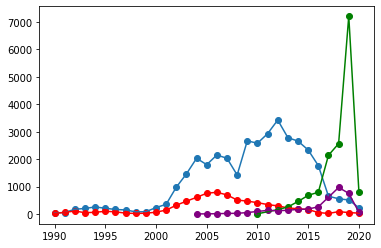

In [11]:
d1 = casos.groupby("AÑO").size()
d2 = victimas[victimas["condicion"] == "Fuerza pública"].groupby("AÑO").size()
d3 = educacion.groupby("AÑO").size()
d4 = desminado.groupby("ano").size()
plt.scatter(d1.index,d1.values)
plt.scatter(d2.index,d2.values,c="red")
plt.scatter(d3.index, d3.values, c="green")
plt.scatter(d4.index,d4.values, c="purple")
plt.plot(d1)
plt.plot(d2,color="red")
plt.plot(d3,color="green")
plt.plot(d4,color="purple")

In [12]:
educacion.keys()

Index(['ID_ERM', 'DEPARTAMENTO', 'CODIGO_DANE_DEPARTAMENTO', 'MUNICIPIO',
       'CODIGO_DANE_MUNICIPIO', 'ORGANIZACIÓN', 'MOTIVO_ACTIVIDAD',
       'FECHA_INICIO', 'AÑO', 'FECHA_FINALIZACION', 'SITIO', 'TIPO',
       'INDIGENASHOMBRESEDAD0A5', 'INDIGENASHOMBRESEDAD6A11',
       'INDIGENASHOMBRESEDAD12A17', 'INDIGENASHOMBRESEDAD18A23',
       'INDIGENASHOMBRESEDAD24OMAS', 'INDIGENASHOMBRESEDADTOTALH',
       'INDIGENASMUJERESEDAD0A5', 'INDIGENASMUJERESEDAD6A11',
       'INDIGENASMUJERESEDAD12A17', 'INDIGENASMUJERESEDAD18A23',
       'INDIGENASMUJERESEDAD24OMAS', 'INDIGENASMUJERESEDADTOTALM',
       'AFROSHOMBRESEDAD0A5', 'AFROSHOMBRESEDAD6A11', 'AFROSHOMBRESEDAD12A17',
       'AFROSHOMBRESEDAD18A23', 'AFROSHOMBRESEDAD24OMAS',
       'AFROSHOMBRESEDADTOTALH', 'AFROSMUJERESEDAD0A5', 'AFROSMUJERESEDAD6A11',
       'AFROSMUJERESEDAD12A17', 'AFROSMUJERESEDAD18A23',
       'AFROSMUJERESEDAD24OMAS', 'AFROSMUJERESEDADTOTALM',
       'MESTIZOSHOMBRESEDAD0A5', 'MESTIZOSHOMBRESEDAD6A11',
       '

In [13]:
for key in educacion.keys():
  print(key,"->",educacion.loc[1000][key])

ID_ERM -> ERM_ACT_686
DEPARTAMENTO -> META
CODIGO_DANE_DEPARTAMENTO -> 50
MUNICIPIO -> VISTAHERMOSA
CODIGO_DANE_MUNICIPIO -> 50711
ORGANIZACIÓN -> THE HALO TRUST
MOTIVO_ACTIVIDAD -> Enlace comunitario
FECHA_INICIO -> 2017-05-07 00:00:00
AÑO -> 2017
FECHA_FINALIZACION -> 2017-05-07 00:00:00
SITIO -> Sin especificar
TIPO -> ERM en Desminado Humanitario
INDIGENASHOMBRESEDAD0A5 -> 0
INDIGENASHOMBRESEDAD6A11 -> 0
INDIGENASHOMBRESEDAD12A17 -> 0
INDIGENASHOMBRESEDAD18A23 -> 0
INDIGENASHOMBRESEDAD24OMAS -> 0
INDIGENASHOMBRESEDADTOTALH -> 0
INDIGENASMUJERESEDAD0A5 -> 0
INDIGENASMUJERESEDAD6A11 -> 0
INDIGENASMUJERESEDAD12A17 -> 0
INDIGENASMUJERESEDAD18A23 -> 0
INDIGENASMUJERESEDAD24OMAS -> 0
INDIGENASMUJERESEDADTOTALM -> 0
AFROSHOMBRESEDAD0A5 -> 0
AFROSHOMBRESEDAD6A11 -> 0
AFROSHOMBRESEDAD12A17 -> 0
AFROSHOMBRESEDAD18A23 -> 0
AFROSHOMBRESEDAD24OMAS -> 0
AFROSHOMBRESEDADTOTALH -> 0
AFROSMUJERESEDAD0A5 -> 0
AFROSMUJERESEDAD6A11 -> 0
AFROSMUJERESEDAD12A17 -> 0
AFROSMUJERESEDAD18A23 -> 0
AFROSMUJERE

In [14]:
[x for x in range(-5,5,1)]

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

In [15]:
import swifter

In [16]:
def agregarCasosVictimas(df,nMonthsBefore):
  #getPreviousDate(currentDate, nMonthsBefore)
  colName = "CASOS_MES_" + str(nMonthsBefore)
  df[colName] = educacion.swifter.apply(lambda x: len(filterData(casos,x["CODIGO_DANE_MUNICIPIO"],getPreviousDate((x["FECHA_INICIO"].month,x["FECHA_INICIO"].year),nMonthsBefore))), axis=1)
  colName = "VICTIMAS_MES_" + str(nMonthsBefore)
  df[colName] = educacion.swifter.apply(lambda x: len(filterData(victimas,x["CODIGO_DANE_MUNICIPIO"],getPreviousDate((x["FECHA_INICIO"].month,x["FECHA_INICIO"].year),nMonthsBefore))), axis=1)
  return df

In [17]:
edu = educacion
for i in range(4,-5,-1):
  print(i,"/",-4)
  edu = agregarCasosVictimas(edu,i)

4 / -4



3 / -4



2 / -4



1 / -4



0 / -4



-1 / -4



-2 / -4



-3 / -4



-4 / -4


In [21]:
def agregarTasaCrecimiento(df,n1,n2):
    n1, n2 = str(n1), str(n2)
    colName = "INCR_CASOS_" + n1 + "_" + n2
    col1 = "CASOS_MES_" + n1
    col2 = "CASOS_MES_" + n2
    df[colName] = df.swifter.apply(
        lambda x: (x[col2]-x[col1]), axis=1)
    
    n1, n2 = str(n1), str(n2)
    colName = "INCR_VICTIMAS_" + n1 + "_" + n2
    col1 = "VICTIMAS_MES_" + n1
    col2 = "VICTIMAS_MES_" + n2
    df[colName] = df.swifter.apply(
        lambda x: (x[col2]-x[col1]), axis=1)
    return df

In [31]:
for month in range(-4,4):
    nextMonth = month+1
    edu = agregarTasaCrecimiento(edu,month,nextMonth)

## Análisis de Correlaciones

In [32]:
import pandas as _pd
import numpy as _np

from matplotlib import pyplot as plt
from matplotlib.collections import EllipseCollection
def plot_corr_ellipses(data, ax=None, **kwargs):

    M = _np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = _np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = _np.ones_like(M).ravel()
    h = 1 - _np.abs(M).ravel()
    a = 45 * _np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, _pd.DataFrame):
        ax.set_xticks(_np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(_np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec


def corr_partial(df):
    S = df.cov()
    S_1 = _np.linalg.inv(S)
    diag_matrix_s_1_sqrt = _np.diag(1/_np.sqrt(_np.diag(S_1)))
    ones_mask=-_np.ones((len(S),len(S)))
    _np.fill_diagonal(ones_mask,_np.ones(len(S)))
    almost_P = diag_matrix_s_1_sqrt@S_1@diag_matrix_s_1_sqrt
    return _pd.DataFrame(_np.multiply(ones_mask,almost_P), columns = df.columns, index = df.columns)

def R_2(df):
  if isinstance(df, _pd.DataFrame):
    df = df.to_numpy()
  S = _np.cov(df, rowvar=False)
  S_inv = _np.linalg.inv(S)
  return 1 - (1/(_np.diag(S)*_np.diag(S_inv)))

In [33]:
educacion.keys()

Index(['ID_ERM', 'DEPARTAMENTO', 'CODIGO_DANE_DEPARTAMENTO', 'MUNICIPIO',
       'CODIGO_DANE_MUNICIPIO', 'ORGANIZACIÓN', 'MOTIVO_ACTIVIDAD',
       'FECHA_INICIO', 'AÑO', 'FECHA_FINALIZACION', 'SITIO', 'TIPO',
       'INDIGENASHOMBRESEDAD0A5', 'INDIGENASHOMBRESEDAD6A11',
       'INDIGENASHOMBRESEDAD12A17', 'INDIGENASHOMBRESEDAD18A23',
       'INDIGENASHOMBRESEDAD24OMAS', 'INDIGENASHOMBRESEDADTOTALH',
       'INDIGENASMUJERESEDAD0A5', 'INDIGENASMUJERESEDAD6A11',
       'INDIGENASMUJERESEDAD12A17', 'INDIGENASMUJERESEDAD18A23',
       'INDIGENASMUJERESEDAD24OMAS', 'INDIGENASMUJERESEDADTOTALM',
       'AFROSHOMBRESEDAD0A5', 'AFROSHOMBRESEDAD6A11', 'AFROSHOMBRESEDAD12A17',
       'AFROSHOMBRESEDAD18A23', 'AFROSHOMBRESEDAD24OMAS',
       'AFROSHOMBRESEDADTOTALH', 'AFROSMUJERESEDAD0A5', 'AFROSMUJERESEDAD6A11',
       'AFROSMUJERESEDAD12A17', 'AFROSMUJERESEDAD18A23',
       'AFROSMUJERESEDAD24OMAS', 'AFROSMUJERESEDADTOTALM',
       'MESTIZOSHOMBRESEDAD0A5', 'MESTIZOSHOMBRESEDAD6A11',
       '

In [45]:
cols = [#'TotalHombres','TotalMujeres',
      #  'CASOS_MES_-2','CASOS_MES_-1','CASOS_MES_0','CASOS_MES_1','CASOS_MES_2',
    'INCR_CASOS_-4_-3','INCR_CASOS_-3_-2','INCR_CASOS_-2_-1','INCR_CASOS_-1_0',
    'INCR_CASOS_0_1','INCR_CASOS_1_2','INCR_CASOS_2_3','INCR_CASOS_3_4'
      #  'VICTIMAS_MES_-2','VICTIMAS_MES_-1','VICTIMAS_MES_0','VICTIMAS_MES_1','VICTIMAS_MES_2',
      ]
df = edu[cols]
r2 = R_2(df)
corr = df.corr()

In [46]:
educacion["MUNICIPIO"].value_counts()[:10]

TUMACO          607
FORTUL          397
SARAVENA        368
VISTAHERMOSA    351
EL TARRA        326
CUMBAL          325
TIBÚ            311
SUÁREZ          290
ARAUQUITA       266
RIOSUCIO        257
Name: MUNICIPIO, dtype: int64

In [47]:
victimas["municipio"].value_counts()[:10]

VISTAHERMOSA              370
TAME                      348
TUMACO                    308
TARAZÁ                    269
SAN VICENTE DEL CAGUÁN    262
MONTAÑITA                 250
ITUANGO                   245
PUERTO RICO               245
TEORAMA                   184
SAN CARLOS                172
Name: municipio, dtype: int64

<AxesSubplot:>

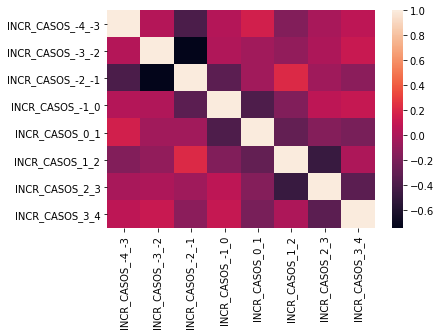

In [48]:
import seaborn as sns
sns.heatmap(corr)

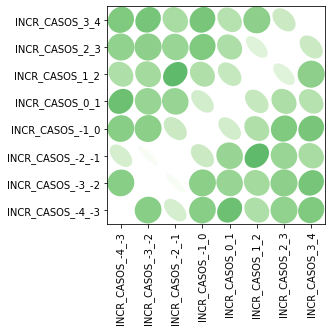

In [49]:
plot_corr_ellipses(corr,cmap='Greens')

In [60]:
def analizeRelativeMonth(month):
    nextMonth = str(month+1)
    prevMonth = str(month-1)
    month = str(month)

,ID_ERM,DEPARTAMENTO,CODIGO_DANE_DEPARTAMENTO,MUNICIPIO,CODIGO_DANE_MUNICIPIO,ORGANIZACIÓN,MOTIVO_ACTIVIDAD,FECHA_INICIO,AÑO,FECHA_FINALIZACION,...,INCR_CASOS_-1_0,INCR_VICTIMAS_-1_0,INCR_CASOS_0_1,INCR_VICTIMAS_0_1,INCR_CASOS_1_2,INCR_VICTIMAS_1_2,INCR_CASOS_2_3,INCR_VICTIMAS_2_3,INCR_CASOS_3_4,INCR_VICTIMAS_3_4
31,ERM_ACT_275,ANTIOQUIA,5,CÁCERES,5120,Campaña Colombiana Contra Minas,Sin especificar,2017-10-05,2017,2017-10-05,...,0,0,0,0,0,0,0,0,1,0
36,ERM_ACT_280,ANTIOQUIA,5,VALDIVIA,5854,Campaña Colombiana Contra Minas,Sin especificar,2017-05-19,2017,2017-05-19,...,1,0,-1,0,1,0,0,2,1,-2
37,ERM_ACT_281,ANTIOQUIA,5,YARUMAL,5887,Campaña Colombiana Contra Minas,Sin especificar,2017-10-05,2017,2017-10-05,...,0,0,0,0,0,0,1,0,1,0
39,ERM_ACT_287,ANTIOQUIA,5,DABEIBA,5234,Campaña Colombiana Contra Minas,Sin especificar,2017-05-17,2017,2017-05-17,...,0,0,0,0,0,0,0,0,0,0
44,ERM_ACT_292,ANTIOQUIA,5,ANGOSTURA,5038,Campaña Colombiana Contra Minas,Sin especificar,2017-05-19,2017,2017-05-19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17466,ERM_ACT_54759,NARIÑO,52,LEIVA,52405,CORPORACION PAZ Y DEMOCRACIA,Sin especificar,2019-10-23,2019,2019-10-23,...,0,0,0,0,0,0,0,0,0,0
17467,ERM_ACT_54760,NARIÑO,52,RICAURTE,52612,CORPORACION PAZ Y DEMOCRACIA,Sin especificar,2019-10-24,2019,2019-10-24,...,0,0,0,0,0,0,0,0,0,0
17482,ERM_ACT_54757,NARIÑO,52,RICAURTE,52612,CORPORACION PAZ Y DEMOCRACIA,Sin especificar,2019-10-15,2019,2019-10-15,...,0,0,0,0,0,0,0,0,0,0
17483,ERM_ACT_54909,NARIÑO,52,SAMANIEGO,52678,PASTORAL SOCIAL PASTO,Sin especificar,2020-02-24,2020,2020-02-24,...,0,0,0,0,0,0,0,0,0,0


In [50]:
corr

,INCR_CASOS_-4_-3,INCR_CASOS_-3_-2,INCR_CASOS_-2_-1,INCR_CASOS_-1_0,INCR_CASOS_0_1,INCR_CASOS_1_2,INCR_CASOS_2_3,INCR_CASOS_3_4
INCR_CASOS_-4_-3,1.000000,0.032048,-0.398181,0.034842,0.164425,-0.167135,-0.012111,0.075954
INCR_CASOS_-3_-2,0.032048,1.000000,-0.737860,0.018225,-0.043837,-0.102918,0.006675,0.124272
INCR_CASOS_-2_-1,-0.398181,-0.737860,1.000000,-0.330180,-0.043517,0.214290,-0.046419,-0.130084
INCR_CASOS_-1_0,0.034842,0.018225,-0.330180,1.000000,-0.379785,-0.169976,0.072670,0.105367
INCR_CASOS_0_1,0.164425,-0.043837,-0.043517,-0.379785,1.000000,-0.296525,-0.159527,-0.208064
INCR_CASOS_1_2,-0.167135,-0.102918,0.214290,-0.169976,-0.296525,1.000000,-0.477092,0.008493
INCR_CASOS_2_3,-0.012111,0.006675,-0.046419,0.072670,-0.159527,-0.477092,1.000000,-0.328802
INCR_CASOS_3_4,0.075954,0.124272,-0.130084,0.105367,-0.208064,0.008493,-0.328802,1.000000


In [51]:
np.linalg.det(corr)

0.056542469515805716

In [52]:
partialCorrelation = corr_partial(df)

<AxesSubplot:>

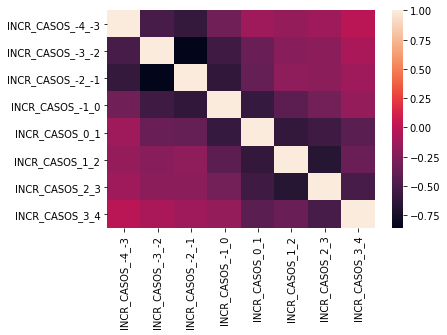

In [53]:
sns.heatmap(partialCorrelation)

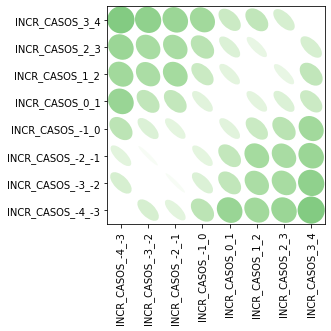

In [54]:
plot_corr_ellipses(partialCorrelation, cmap='Greens')

In [55]:
corr

,INCR_CASOS_-4_-3,INCR_CASOS_-3_-2,INCR_CASOS_-2_-1,INCR_CASOS_-1_0,INCR_CASOS_0_1,INCR_CASOS_1_2,INCR_CASOS_2_3,INCR_CASOS_3_4
INCR_CASOS_-4_-3,1.000000,0.032048,-0.398181,0.034842,0.164425,-0.167135,-0.012111,0.075954
INCR_CASOS_-3_-2,0.032048,1.000000,-0.737860,0.018225,-0.043837,-0.102918,0.006675,0.124272
INCR_CASOS_-2_-1,-0.398181,-0.737860,1.000000,-0.330180,-0.043517,0.214290,-0.046419,-0.130084
INCR_CASOS_-1_0,0.034842,0.018225,-0.330180,1.000000,-0.379785,-0.169976,0.072670,0.105367
INCR_CASOS_0_1,0.164425,-0.043837,-0.043517,-0.379785,1.000000,-0.296525,-0.159527,-0.208064
INCR_CASOS_1_2,-0.167135,-0.102918,0.214290,-0.169976,-0.296525,1.000000,-0.477092,0.008493
INCR_CASOS_2_3,-0.012111,0.006675,-0.046419,0.072670,-0.159527,-0.477092,1.000000,-0.328802
INCR_CASOS_3_4,0.075954,0.124272,-0.130084,0.105367,-0.208064,0.008493,-0.328802,1.000000
